In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import urllib.request
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')
%matplotlib inline
import csv
import datetime as dt

##DATA COLLECTION

In [2]:
url= "https://covid19.ncdc.gov.ng"      #Web scrapping

In [3]:
page= requests.get(url)

In [4]:
 soup = BeautifulSoup(page.text, "html")

In [5]:
table = soup.find('table')

In [6]:
header_list = []

In [7]:
header= table.find_all("th")

In [8]:
for i in header:
    head = i.text
    header_list.append(head)

In [9]:
print(header_list)

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [10]:
df=pd.DataFrame(columns=header_list)

In [11]:
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths


In [12]:
column_data = table.find_all('tr')

In [13]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length= len(df)
    df.loc[length] = individual_row_data

In [14]:
df.head()               # Save to data frame object

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,286","1,143","102,372",771
1,FCT,"29,535",9,"29,277",249
2,Rivers,"18,112",-3,"17,960",155
3,Kaduna,"11,675",3,"11,583",89
4,Plateau,"10,365",4,"10,286",75


#Saving the data from the GitHub repo link to DataFrame 

In [15]:
files = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [16]:
daily_confirmed_cases = pd.read_csv(files)

In [17]:
daily_confirmed_cases.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496


In [18]:
files_1 = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [19]:
daily_recovered_cases = pd.read_csv(files_1)

In [20]:
daily_recovered_cases.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
files_2 ="https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [22]:
daily_death_cases=pd.read_csv(files_2)

In [23]:
daily_death_cases.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881


##Save the external data to a DataFrame

In [24]:
budget_data = pd.read_csv("Budget data.csv")

In [25]:
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [26]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [27]:
covid_external = pd.read_csv("covid_external.csv")

In [28]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [29]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [30]:
covidnig = pd.read_csv("covidnig.csv")

In [31]:
covidnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [32]:
covidnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [33]:
realGDP = pd.read_csv("RealGDP.csv")

In [34]:
realGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [35]:
realGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [36]:
df.info()               #scrap data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [37]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,286","1,143","102,372",771
1,FCT,"29,535",9,"29,277",249
2,Rivers,"18,112",-3,"17,960",155
3,Kaduna,"11,675",3,"11,583",89
4,Plateau,"10,365",4,"10,286",75


##Data Cleaning and preparation

In [38]:
df = df.replace({',':'','-':'',' ':''},regex=True)               # scrap data cleaning

In [39]:
df = df.astype({'No. of Cases (Lab Confirmed)':'int','No. of Cases (on admission)':'int','No. Discharged':'int','No. of Deaths':'int'})

In [40]:
df.dtypes           # displaying the scrap dataset after converting to the appropriate datatype

States Affected                 object
No. of Cases (Lab Confirmed)     int32
No. of Cases (on admission)      int32
No. Discharged                   int32
No. of Deaths                    int32
dtype: object

In [41]:
covidnig= covidnig.replace({',':'',' ':''},regex=True)               # Cleaning one of the external dataset

In [42]:
covidnig=covidnig.astype({'No. of Cases (Lab Confirmed)':'int','No. of Cases (on admission)':'int','No. Discharged':'int','No. of Deaths':'int'})

In [43]:
covidnig.dtypes      # displaying the external dataset after convert the external dataset to the appropriate datatype

States Affected                 object
No. of Cases (Lab Confirmed)     int32
No. of Cases (on admission)      int32
No. Discharged                   int32
No. of Deaths                    int32
dtype: object

##Extract daily data for Nigeria from the Global daily cases data 

In [44]:
Daily_confirmed =daily_confirmed_cases.drop(['Province/State','Lat','Long'], axis=1)

In [45]:
Daily_confirmed=(Daily_confirmed.groupby('Country/Region').sum().loc["Nigeria"]).to_frame().reset_index()

In [46]:
Daily_confirmed.columns=['Date','Cases']

In [47]:
Daily_confirmed

,Date,Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
1138,3/5/23,266598
1139,3/6/23,266598
1140,3/7/23,266598
1141,3/8/23,266598


In [48]:
Daily_confirmed['Date']=pd.to_datetime(Daily_confirmed.Date)  # Convert the Date column to datetime

In [49]:
Daily_confirmed

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,266598
1139,2023-03-06,266598
1140,2023-03-07,266598
1141,2023-03-08,266598


In [50]:
Daily_recovered= daily_recovered_cases.drop(['Province/State','Lat','Long'], axis=1)

In [51]:
Daily_recovered=(Daily_recovered.groupby('Country/Region').sum().loc["Nigeria"]).to_frame().reset_index()

In [52]:
Daily_recovered.columns=['Date','Cases']

In [53]:
Daily_recovered['Date']=pd.to_datetime(Daily_confirmed.Date) # Convert the Date column to datetime

In [54]:
Daily_recovered

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,0
1139,2023-03-06,0
1140,2023-03-07,0
1141,2023-03-08,0


In [55]:
Daily_death = daily_death_cases.drop(['Province/State','Lat','Long'], axis=1)

In [56]:
Daily_death=(Daily_death.groupby('Country/Region').sum().loc["Nigeria"]).to_frame().reset_index()

In [57]:
Daily_death.columns=['Date','Cases']

In [58]:
Daily_death['Date']=pd.to_datetime(Daily_death.Date) # Convert the Date column to datetime

In [59]:
Daily_death

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,3155
1139,2023-03-06,3155
1140,2023-03-07,3155
1141,2023-03-08,3155


# ANALYSIS

In [60]:
lab_case=df.sort_values(by='No. of Cases (Lab Confirmed)',ascending=False).head(10)

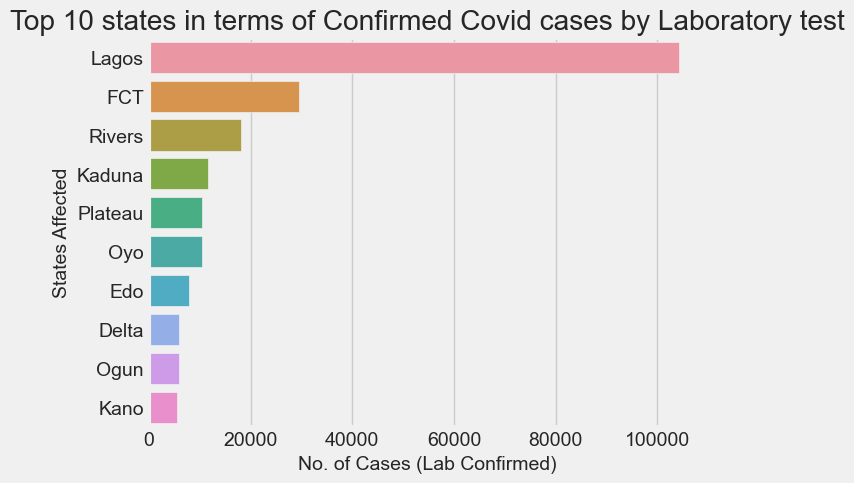

In [61]:
sns.barplot(x='No. of Cases (Lab Confirmed)', y='States Affected',data=lab_case)
plt.title('Top 10 states in terms of Confirmed Covid cases by Laboratory test')
plt.show()

          #Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [62]:
discharged =df.sort_values(by='No. Discharged',ascending=False).head(10)

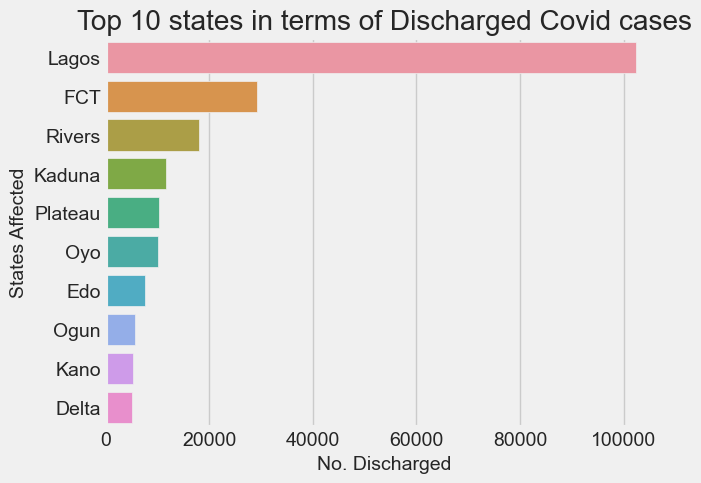

In [63]:
sns.barplot(x='No. Discharged', y='States Affected',data=discharged) 
plt.title('Top 10 states in terms of Discharged Covid cases')
plt.show()
#Top 10 states in terms of Discharged Covid cases

In [64]:
dead =df.sort_values(by='No. of Deaths',ascending=False).head(10)

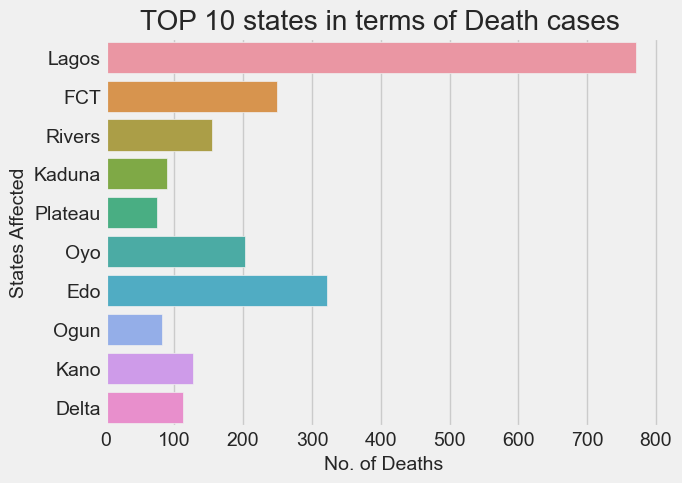

In [65]:
sns.barplot(x='No. of Deaths', y='States Affected',data=discharged)
plt.title('TOP 10 states in terms of Death cases ') 
plt.show()                                                                 # TOP 10 Death cases

### Lagos has the higest figure in term of covid confirmed cases (lab test),discharge cases and dealth cases


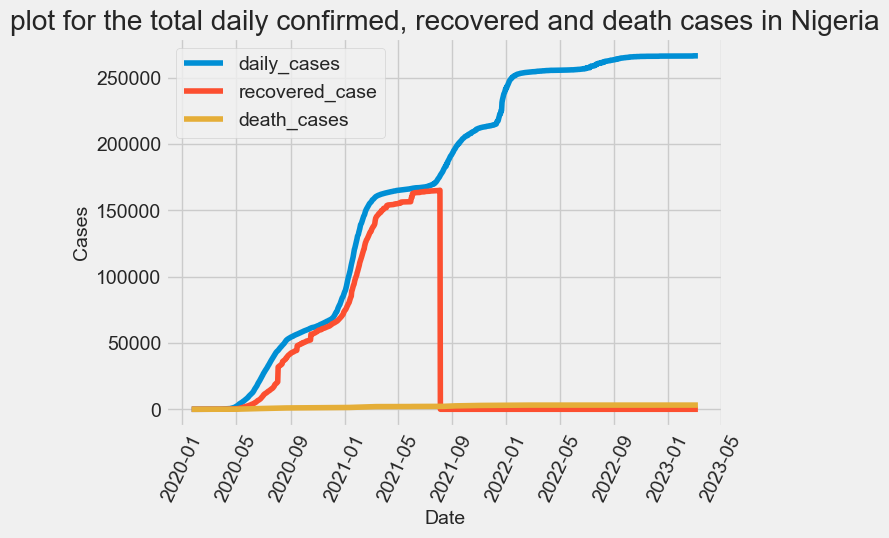

In [66]:
plt.plot(Daily_confirmed.Date, Daily_confirmed.Cases )
plt.plot(Daily_recovered.Date, Daily_recovered.Cases)
plt.plot(Daily_death.Date,  Daily_death.Cases)
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=65)
plt.legend(['daily_cases','recovered_case','death_cases'])
plt.title("plot for the total daily confirmed, recovered and death cases in Nigeria")
plt.show()

In [67]:
daily_infection_rate_1=Daily_confirmed['Cases'].diff()

In [68]:
daily_infection_rate_1

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1138    0.0
1139    0.0
1140    0.0
1141    0.0
1142    0.0
Name: Cases, Length: 1143, dtype: float64

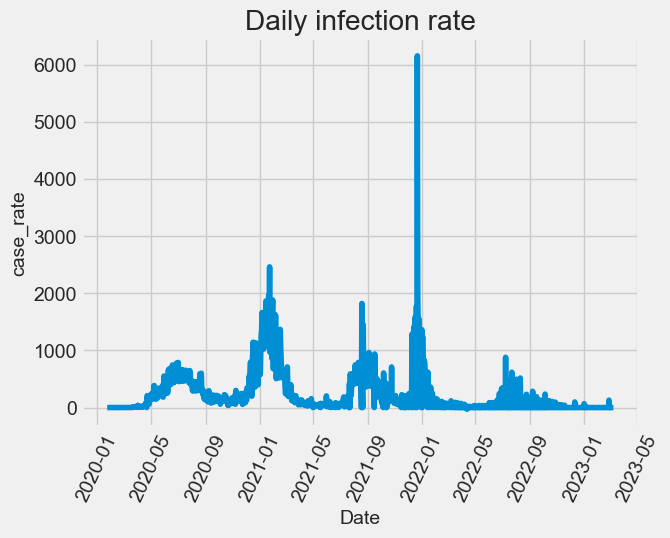

In [69]:
plt.plot(Daily_confirmed.Date, daily_infection_rate_1)
plt.title("Daily infection rate")
plt.xlabel('Date')
plt.xticks(rotation=65)
plt.ylabel("case_rate")
plt.show()

In [70]:
daily_infection_rate_1.max()    #maximum infection rate for a day is 6158 and the date 2022-01

6158.0

* maximum infection rate for a day is 6158 and the date 2022-01

In [71]:
cov_external=covid_external.rename(columns={"states":"States Affected"}) #renaming a column for the merge

In [72]:
merge_data = cov_external.merge(df)

In [73]:
merge_data.head(2)

,States Affected,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,29535,9,29277,249
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,10365,4,10286,75


In [74]:
merge_data_1=merge_data.nlargest(10,"No. of Cases (Lab Confirmed)")[["States Affected","No. of Cases (Lab Confirmed)","Overall CCVI Index"]].set_index("States Affected")

In [75]:
merge_data_1

,No. of Cases (Lab Confirmed),Overall CCVI Index
States Affected,,
Lagos,104286,0.0
FCT,29535,0.3
Rivers,18112,0.4
Kaduna,11675,0.7
Plateau,10365,0.4
Oyo,10352,0.2
Edo,7928,0.1
Delta,5858,0.4
Ogun,5810,0.3


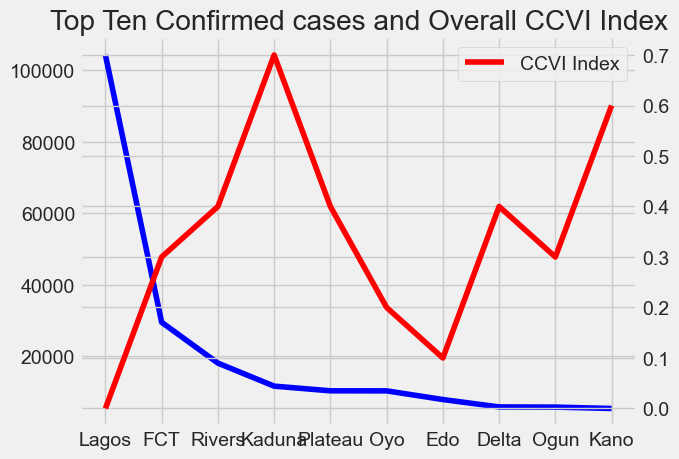

In [78]:
fig, ax1 =plt.subplots()
ax1.plot(merge_data_1.index, merge_data_1['No. of Cases (Lab Confirmed)'],label="Comfirmed case", color="blue")
ax2=ax1.twinx()
ax2.plot(merge_data_1.index, merge_data_1['Overall CCVI Index'],label="CCVI Index", color="red")
plt.xticks(rotation=70)
plt.title("Top Ten Confirmed cases and Overall CCVI Index")
plt.legend()

plt.show()


* The is no correlation between the confirmed case and overall CCVI index
* Lagos with the highest number of confirmed cases and has the least overall CCVI index
* Where the confirmed cases is higher the overall CCVI index was low.
* Kaduna with lower confirmed case has a higher Overall CCVI index
* The overall CCVI index keeps fluctating amonge the states

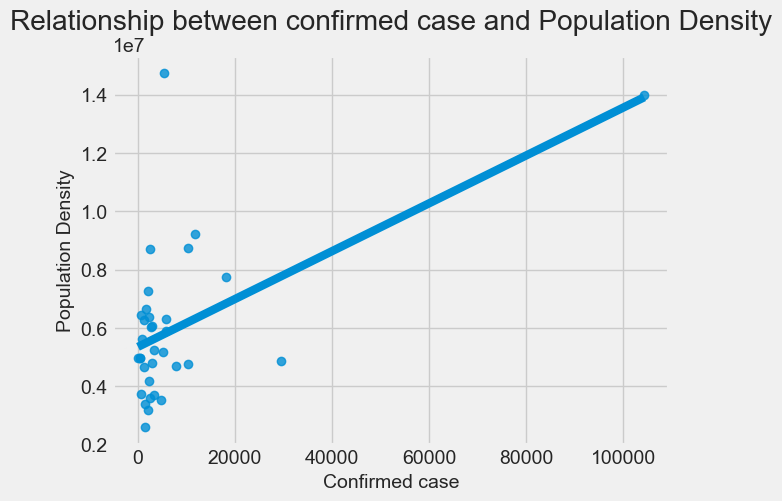

In [77]:
sns.regplot(x= merge_data['No. of Cases (Lab Confirmed)'], y=merge_data['Population'],ci=None)
plt.xlabel("Confirmed case")
plt.ylabel("Population Density")
plt.title("Relationship between confirmed case and Population Density")
plt.show()

* There is a linear relationship between the population density and the confirmed cases.
* There higher the population density, the more the number of confirmed cases.
* However,there are few outliers

In [79]:
daily_infection_rate_1.mean()       # Average daily_infection_rate

233.44833625218914

In [80]:
Daily_recovered_1 = Daily_recovered['Cases'].diff()

In [144]:
Daily_recovered_1

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1138    0.0
1139    0.0
1140    0.0
1141    0.0
1142    0.0
Name: Cases, Length: 1143, dtype: float64

In [81]:
Daily_recovered_1.max()                  # Maximum daily recovered rate.

11188.0

In [82]:
lab_1=merge_data.nlargest(10,"No. of Cases (on admission)")[["No. of Cases (on admission)","States Affected"]].set_index("States Affected") 

In [83]:
lab_1

,No. of Cases (on admission)
States Affected,
Lagos,1143
Delta,576
Kwara,452
Ondo,315
Niger,165
Adamawa,134
Benue,88
Anambra,46
Taraba,32


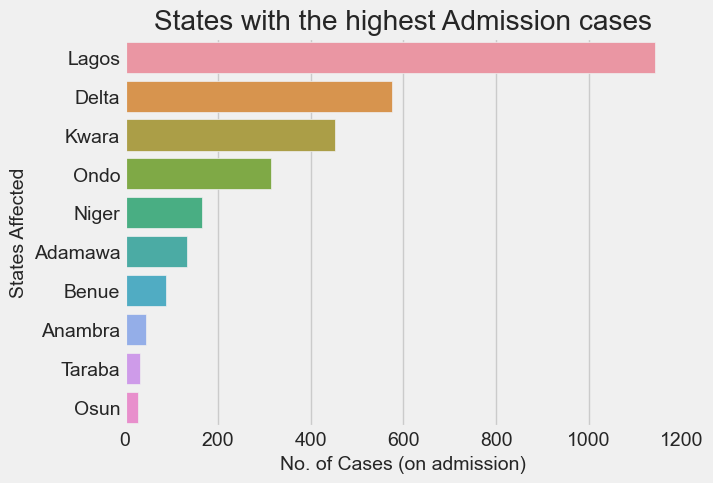

In [84]:
sns.barplot(x="No. of Cases (on admission)",y=lab_1.index,data=lab_1)
plt.title("States with the highest Admission cases")
plt.show()

*Lagos recorded highest admission cases follow by Delta state.

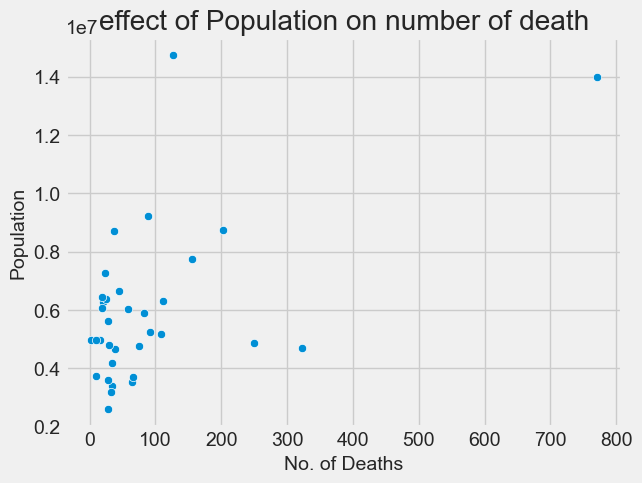

In [110]:
sns.scatterplot(x="No. of Deaths",y="Population",data=merge_data)
plt.title("effect of Population on number of death")
plt.show()

* There correlation between the population and the number of death.
* The higher the population the higher the number of deaths

In [86]:
GDP=pd.melt(realGDP,id_vars="Year",value_vars=["Q1","Q2","Q3","Q4"],var_name="Quarters",value_name="Value")

In [87]:
GDP

,Year,Quarters,Value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


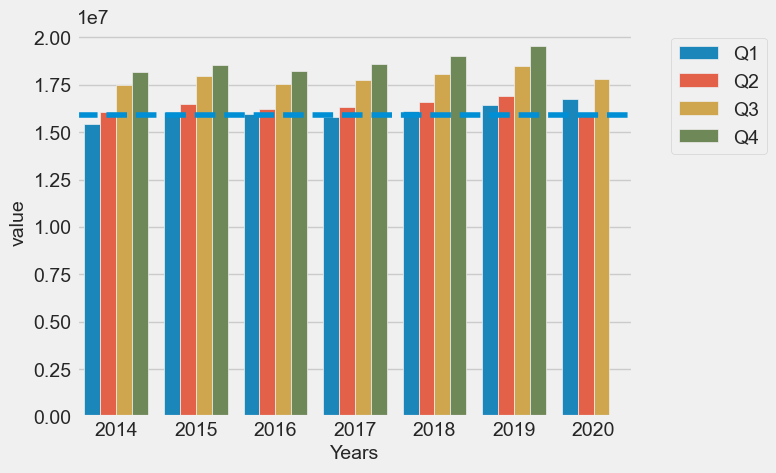

In [88]:
sns.barplot(x='Year',y='Value',hue='Quarters',data=GDP)
plt.xlabel("Years")
plt.ylabel("value")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.axhline(y=1.589e7, ls='--')
plt.show()

* The value of the GDP contracted at the second quater of 2020.
* This as a result of the impact of covid 19 on the economy

In [90]:
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [97]:
budget=budget_data.sort_values(by="Initial_budget (Bn)",ascending=False).head(10)

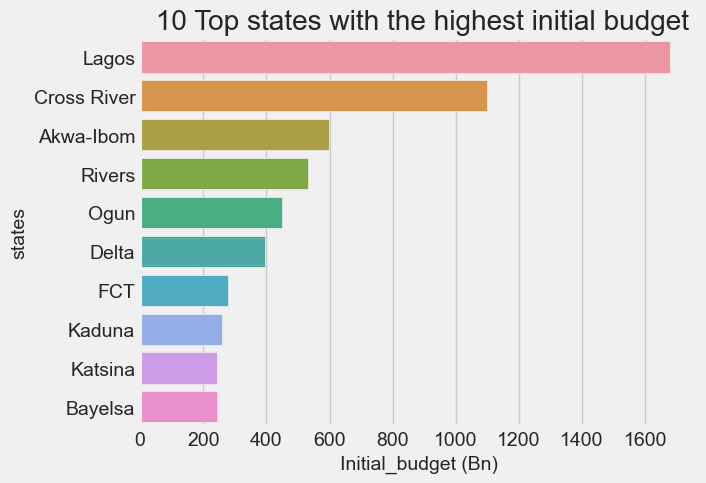

In [99]:
sns.barplot(x="Initial_budget (Bn)",y="states",data=budget)
plt.title(" 10 Top states with the highest initial budget")
plt.show()